1.IMPORTING LIBRARIES

In [ ]:


import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd


from sklearn.model_selection import train_test_split

2.NUM_OF_CLASSESS

In [ ]:
RANDOM_SEED = 42
NUM_CLASSES = 36


3.PATHS

In [ ]:
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier.keras.h5'

4.splitting in training & testing (X- data Y- label)

In [ ]:
x_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

5. model archi

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 36)                936       
                                                                 
Total params: 4361 (17.04 KB)
Trainable params: 4361 (17.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6.CALLBACKS

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

7.COMPILE

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

8. MODEL FIT

In [ ]:
# change epoch to 800-1000
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 [====>.........................] - ETA: 5s - loss: 3.6991 - accuracy: 0.0312
Epoch 1: saving model to keypoint_classifier.keras.h5
6/6 [==============================] - 1s 65ms/step - loss: 3.6384 - accuracy: 0.0316 - val_loss: 3.5589 - val_accuracy: 0.0453
Epoch 2/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.6389 - accuracy: 0.0078
Epoch 2: saving model to keypoint_classifier.keras.h5
6/6 [==============================] - 0s 15ms/step - loss: 3.5738 - accuracy: 0.0454 - val_loss: 3.5224 - val_accuracy: 0.0453
Epoch 3/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.4936 - accuracy: 0.0781
Epoch 3: saving model to keypoint_classifier.keras.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 19ms/step - loss: 3.5334 - accuracy: 0.0564 - val_loss: 3.4932 - val_accuracy: 0.1070
Epoch 4/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.5525 - accuracy: 0.0391
Epoch 4: saving model to keypoint_classifier.keras.h5
6/6 [==============================] - 0s 15ms/step - loss: 3.5233 - accuracy: 0.0633 - val_loss: 3.4663 - val_accuracy: 0.0658
Epoch 5/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.4605 - accuracy: 0.0781
Epoch 5: saving model to keypoint_classifier.keras.h5
6/6 [==============================] - 0s 17ms/step - loss: 3.4765 - accuracy: 0.0812 - val_loss: 3.4342 - val_accuracy: 0.0658
Epoch 6/1000
1/6 [====>.........................] - ETA: 0s - loss: 3.4589 - accuracy: 0.0859
Epoch 6: saving model to keypoint_classifier.keras.h5
6/6 [==============================] - 0s 16ms/step - loss: 3.4384 - accuracy: 0.0894 - val_loss: 3.3978 - val_accuracy: 0.1152
Epoch 7/1000
1/6 [====>.....................

9.EVALUATION

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(x_test, y_test, batch_size=500)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')
model = tf.keras.models.load_model(model_save_path)
tf.saved_model.save(model, './')

1/1 [==============================] - 0s 26ms/step - loss: 0.0930 - accuracy: 1.0000
Validation Loss: 0.09295003116130829, Validation Accuracy: 1.0


10. MAKING PREDICTIONS

In [ ]:
predict_result = model.predict(np.array([x_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 420ms/step
[8.1378394e-15 3.0567871e-15 2.4367074e-26 7.9603447e-22 3.5293417e-12
 7.9464383e-17 8.2580305e-12 3.3500175e-10 9.1386703e-14 3.2751510e-09
 7.1844296e-04 8.5463989e-06 1.8664285e-04 1.7073584e-05 9.5495227e-04
 6.1130628e-08 1.5248737e-21 4.8933711e-21 6.0859190e-07 3.5929521e-30
 7.9426182e-10 6.8367437e-11 9.2997646e-01 5.3943332e-02 3.4699417e-03
 3.5269151e-22 8.8510886e-21 2.4759592e-10 5.1285783e-03 8.9348550e-06
 5.5841887e-03 5.7229136e-07 1.6918023e-06 1.3023901e-20 1.3287852e-15
 1.7456547e-24]
22


11.CONFUSION MATRIX

8/8 [==============================] - 0s 2ms/step


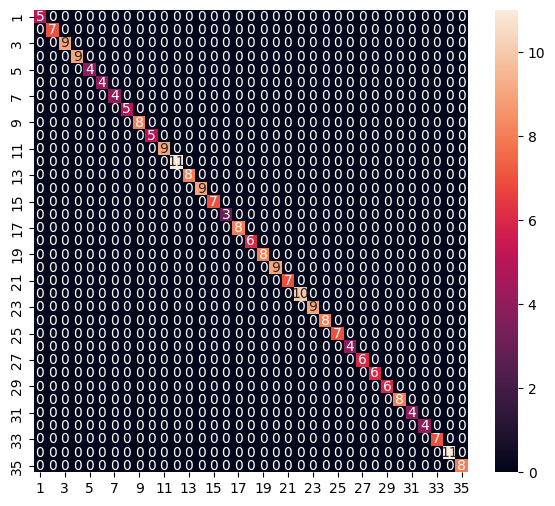

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         8
     

In [ ]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))


Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

12.SAVE MODEL AND CONVERT TO TFLITE

In [ ]:
model.save("saved_model")
# Convert the SavedModel to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()
# Save the converted model (optional)
with open("converted_model2.tflite", "wb") as f:
    f.write(tflite_model)


13.PERFORMING INFERENCE

In [ ]:
with open("converted_model2.tflite", "wb") as f:
    f.write(tflite_model)

converted_model2 = "converted_model2.tflite"
interpreter = tf.lite.Interpreter(model_path=converted_model2)

In [ ]:
# Retrieve input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Allocate tensors
interpreter.allocate_tensors()

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([x_test[0]]))

# Get the output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
%%time
# Perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 1.36 ms, sys: 19 µs, total: 1.37 ms
Wall time: 1.19 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.13783770e-15 3.05678648e-15 2.43670644e-26 7.96037242e-22
 3.52934067e-12 7.94643695e-17 8.25804442e-12 3.35001665e-10
 9.13866828e-14 3.27514993e-09 7.18443829e-04 8.54639711e-06
 1.86643141e-04 1.70736093e-05 9.54952848e-04 6.11307271e-08
 1.52487333e-21 4.89336988e-21 6.08591165e-07 3.59292350e-30
 7.94261601e-10 6.83675477e-11 9.29976225e-01 5.39433695e-02
 3.46994540e-03 3.52690017e-22 8.85108620e-21 2.47595833e-10
 5.12858154e-03 8.93486958e-06 5.58420410e-03 5.72293459e-07
 1.69180987e-06 1.30238965e-20 1.32878474e-15 1.74565393e-24]
22
